In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   # The default processing plot platform for python
import seaborn as sn  # A fancier way to plot things with nice animations and color patterns
import random
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [10]:
breast_cancer_data = pd.read_csv('HW3-data.csv')
breast_cancer_data


,ID,Diagnosis,RadiusM,TextureM,PerimeterM,AreaM,SmoothnessM,CompactnessM,ConcavityM,ConcavePointsM,...,RadiusW,TextureW,PerimeterW,AreaW,SmoothnessW,CompactnessW,ConcavityW,ConcavePointsW,SymmetryW,FdimensionW
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [11]:
breast_cancer_data.shape

(569, 32)

In [12]:
# breast_cancer_data['intercept'] = np.ones(breast_cancer_data.shape[0])
breast_cancer_data

,ID,Diagnosis,RadiusM,TextureM,PerimeterM,AreaM,SmoothnessM,CompactnessM,ConcavityM,ConcavePointsM,...,RadiusW,TextureW,PerimeterW,AreaW,SmoothnessW,CompactnessW,ConcavityW,ConcavePointsW,SymmetryW,FdimensionW
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [13]:
breast_cancer_data.isna().sum()

ID                 0
Diagnosis          0
RadiusM            0
TextureM           0
PerimeterM         0
AreaM              0
SmoothnessM        0
CompactnessM       0
ConcavityM         0
ConcavePointsM     0
SymmetryM          0
FdimensionM        0
RadiusSE           0
TextureSE          0
PerimeterSE        0
AreaSE             0
SmoothnessSE       0
CompactnessSE      0
ConcavitySE        0
ConcavePointsSE    0
SymmetrySE         0
FdimensionSE       0
RadiusW            0
TextureW           0
PerimeterW         0
AreaW              0
SmoothnessW        0
CompactnessW       0
ConcavityW         0
ConcavePointsW     0
SymmetryW          0
FdimensionW        0
dtype: int64

In [14]:
breast_cancer_data.dtypes

ID                   int64
Diagnosis           object
RadiusM            float64
TextureM           float64
PerimeterM         float64
AreaM              float64
SmoothnessM        float64
CompactnessM       float64
ConcavityM         float64
ConcavePointsM     float64
SymmetryM          float64
FdimensionM        float64
RadiusSE           float64
TextureSE          float64
PerimeterSE        float64
AreaSE             float64
SmoothnessSE       float64
CompactnessSE      float64
ConcavitySE        float64
ConcavePointsSE    float64
SymmetrySE         float64
FdimensionSE       float64
RadiusW            float64
TextureW           float64
PerimeterW         float64
AreaW              float64
SmoothnessW        float64
CompactnessW       float64
ConcavityW         float64
ConcavePointsW     float64
SymmetryW          float64
FdimensionW        float64
dtype: object

In [15]:

import seaborn as sns 

X = breast_cancer_data.drop(['Diagnosis','ID'],axis=1)
# X_1 = breast_cancer_data[['intercept','RadiusM','TextureM','PerimeterM','AreaM','SmoothnessM','CompactnessM','ConcavityM','ConcavePointsM','SymmetryM','FdimensionM','RadiusSE','TextureSE','PerimeterSE','AreaSE','SmoothnessSE','CompactnessSE','ConcavitySE','ConcavePointsSE','SymmetrySE','FdimensionSE']]
# X_2 = breast_cancer_data[['intercept','RadiusSE','TextureSE','PerimeterSE','AreaSE','SmoothnessSE','CompactnessSE','ConcavitySE','ConcavePointsSE','SymmetrySE','FdimensionSE','RadiusW','TextureW','PerimeterW','AreaW','SmoothnessW','CompactnessW','ConcavityW','ConcavePointsW','SymmetryW','FdimensionW']]
# X_3 = breast_cancer_data[['intercept','RadiusW','TextureW','PerimeterW','AreaW','SmoothnessW','CompactnessW','ConcavityW','ConcavePointsW','SymmetryW','FdimensionW','RadiusSE','TextureSE','PerimeterSE','AreaSE','SmoothnessSE','CompactnessSE','ConcavitySE','ConcavePointsSE','SymmetrySE','FdimensionSE']]

In [16]:
# X = breast_cancer_data.drop(['Diagnosis','ID'],axis=1)
# X.dtypes
# sns.heatmap(X, cmap="YlGnBu", annot = True)
# plt.show()

In [17]:
y = breast_cancer_data[['Diagnosis']]
y = y.Diagnosis.map(dict(M=1, B=0))
y,X

(0      1
 1      1
 2      1
 3      1
 4      1
       ..
 564    1
 565    1
 566    1
 567    1
 568    0
 Name: Diagnosis, Length: 569, dtype: int64,
      RadiusM  TextureM  PerimeterM   AreaM  SmoothnessM  CompactnessM  \
 0      17.99     10.38      122.80  1001.0      0.11840       0.27760   
 1      20.57     17.77      132.90  1326.0      0.08474       0.07864   
 2      19.69     21.25      130.00  1203.0      0.10960       0.15990   
 3      11.42     20.38       77.58   386.1      0.14250       0.28390   
 4      20.29     14.34      135.10  1297.0      0.10030       0.13280   
 ..       ...       ...         ...     ...          ...           ...   
 564    21.56     22.39      142.00  1479.0      0.11100       0.11590   
 565    20.13     28.25      131.20  1261.0      0.09780       0.10340   
 566    16.60     28.08      108.30   858.1      0.08455       0.10230   
 567    20.60     29.33      140.10  1265.0      0.11780       0.27700   
 568     7.76     24.54       4

In [18]:
def forwardSelection(X, y, model_type ="logistic",elimination_criteria = "aic", varchar_process = "dummy_dropfirst", sl=0.05):
    """
    Forward Selection is a function, based on regression models, that returns significant features and selection iterations.\n
    Required Libraries: pandas, numpy, statmodels
    
    Parameters
    ----------
    X : Independent variables (Pandas Dataframe)\n
    y : Dependent variable (Pandas Series, Pandas Dataframe)\n
    model_type : 'linear' or 'logistic'\n
    elimination_criteria : 'aic', 'bic', 'r2', 'adjr2' or None\n
        'aic' refers Akaike information criterion\n
        'bic' refers Bayesian information criterion\n
        'r2' refers R-squared (Only works on linear model type)\n
        'r2' refers Adjusted R-squared (Only works on linear model type)\n
    varchar_process : 'drop', 'dummy' or 'dummy_dropfirst'\n
        'drop' drops varchar features\n
        'dummy' creates dummies for all levels of all varchars\n
        'dummy_dropfirst' creates dummies for all levels of all varchars, and drops first levels\n
    sl : Significance Level (default: 0.05)\n
    

    Returns
    -------
    columns(list), iteration_logs(str)\n\n
    Not Returns a Model
    

    Tested On
    ---------
    Python v3.6.7, Pandas v0.23.4, Numpy v1.15.04, StatModels v0.9.0
    

    See Also
    --------
    https://en.wikipedia.org/wiki/Stepwise_regression
    """
    X = __varcharProcessing__(X,varchar_process = varchar_process)
    return __forwardSelectionRaw__(X, y, model_type = model_type,elimination_criteria = elimination_criteria , sl=sl)
    
def backwardSelection(X, y, model_type ="linear",elimination_criteria = "aic", varchar_process = "dummy_dropfirst", sl=0.05):
    """
    Backward Selection is a function, based on regression models, that returns significant features and selection iterations.\n
    Required Libraries: pandas, numpy, statmodels
    
    Parameters
    ----------
    X : Independent variables (Pandas Dataframe)\n
    y : Dependent variable (Pandas Series, Pandas Dataframe)\n
    model_type : 'linear' or 'logistic'\n
    elimination_criteria : 'aic', 'bic', 'r2', 'adjr2' or None\n
        'aic' refers Akaike information criterion\n
        'bic' refers Bayesian information criterion\n
        'r2' refers R-squared (Only works on linear model type)\n
        'r2' refers Adjusted R-squared (Only works on linear model type)\n
    varchar_process : 'drop', 'dummy' or 'dummy_dropfirst'\n
        'drop' drops varchar features\n
        'dummy' creates dummies for all levels of all varchars\n
        'dummy_dropfirst' creates dummies for all levels of all varchars, and drops first levels\n
    sl : Significance Level (default: 0.05)\n
    

    Returns
    -------
    columns(list), iteration_logs(str)\n\n
    Not Returns a Model
    

    Tested On
    ---------
    Python v3.6.7, Pandas v0.23.4, Numpy v1.15.04, StatModels v0.9.0
    

    See Also
    --------
    https://en.wikipedia.org/wiki/Stepwise_regression    
    """
    X = __varcharProcessing__(X,varchar_process = varchar_process)
    return __backwardSelectionRaw__(X, y, model_type = model_type,elimination_criteria = elimination_criteria , sl=sl)

def __varcharProcessing__(X, varchar_process = "dummy_dropfirst"):
    
    dtypes = X.dtypes
    if varchar_process == "drop":   
        X = X.drop(columns = dtypes[dtypes == np.object].index.tolist())
        print("Character Variables (Dropped):", dtypes[dtypes == np.object].index.tolist())
    elif varchar_process == "dummy":
        X = pd.get_dummies(X,drop_first=False)
        print("Character Variables (Dummies Generated):", dtypes[dtypes == np.object].index.tolist())
    elif varchar_process == "dummy_dropfirst":
        X = pd.get_dummies(X,drop_first=True)
        print("Character Variables (Dummies Generated, First Dummies Dropped):", dtypes[dtypes == np.object].index.tolist())
    else: 
        X = pd.get_dummies(X,drop_first=True)
        print("Character Variables (Dummies Generated, First Dummies Dropped):", dtypes[dtypes == np.object].index.tolist())
    
    X["intercept"] = 1
    cols = X.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    X = X[cols]
    
    return X

def __forwardSelectionRaw__(X, y, model_type ="linear",elimination_criteria = "aic", sl=0.05):

    iterations_log = ""
    cols = X.columns.tolist()
    
    def regressor(y,X, model_type=model_type):
        if model_type == "linear":
            regressor = sm.OLS(y, X).fit()
        elif model_type == "logistic":
            regressor = sm.Logit(y, X).fit()
        else:
            print("\nWrong Model Type : "+ model_type +"\nLinear model type is seleted.")
            model_type = "linear"
            regressor = sm.OLS(y, X).fit()
        return regressor
    
    selected_cols = ["intercept"]
    other_cols = cols[:]
    other_cols.remove("intercept")
    
    model = regressor(y, X[selected_cols])
    
    if elimination_criteria == "aic":
        criteria = model.aic
    elif elimination_criteria == "bic":
        criteria = model.bic
    elif elimination_criteria == "r2" and model_type =="linear":
        criteria = model.rsquared
    elif elimination_criteria == "adjr2" and model_type =="linear":
        criteria = model.rsquared_adj
    
    
    for i in range(X.shape[1]):
        pvals = pd.DataFrame(columns = ["Cols","Pval"])
        for j in other_cols:
            model = regressor(y, X[selected_cols+[j]])
            pvals = pvals.append(pd.DataFrame([[j, model.pvalues[j]]],columns = ["Cols","Pval"]),ignore_index=True)
        pvals = pvals.sort_values(by = ["Pval"]).reset_index(drop=True)
        pvals = pvals[pvals.Pval<=sl]
        if pvals.shape[0] > 0:
            
            model = regressor(y, X[selected_cols+[pvals["Cols"][0]]])
            iterations_log += str("\nEntered : "+pvals["Cols"][0] + "\n")    
            iterations_log += "\n\n"+str(model.summary())+"\nAIC: "+ str(model.aic) + "\nBIC: "+ str(model.bic)+"\n\n"
                    
        
            if  elimination_criteria == "aic":
                new_criteria = model.aic
                if new_criteria < criteria:
                    print("Entered :", pvals["Cols"][0], "\tAIC :", model.aic)
                    selected_cols.append(pvals["Cols"][0])
                    other_cols.remove(pvals["Cols"][0])
                    criteria = new_criteria
                else:
                    print("break : Criteria")
                    break
            elif  elimination_criteria == "bic":
                new_criteria = model.bic
                if new_criteria < criteria:
                    print("Entered :", pvals["Cols"][0], "\tBIC :", model.bic)
                    selected_cols.append(pvals["Cols"][0])
                    other_cols.remove(pvals["Cols"][0])
                    criteria = new_criteria
                else:
                    print("break : Criteria")
                    break        
            elif  elimination_criteria == "r2" and model_type =="linear":
                new_criteria = model.rsquared
                if new_criteria > criteria:
                    print("Entered :", pvals["Cols"][0], "\tR2 :", model.rsquared)
                    selected_cols.append(pvals["Cols"][0])
                    other_cols.remove(pvals["Cols"][0])
                    criteria = new_criteria
                else:
                    print("break : Criteria")
                    break           
            elif  elimination_criteria == "adjr2" and model_type =="linear":
                new_criteria = model.rsquared_adj
                if new_criteria > criteria:
                    print("Entered :", pvals["Cols"][0], "\tAdjR2 :", model.rsquared_adj)
                    selected_cols.append(pvals["Cols"][0])
                    other_cols.remove(pvals["Cols"][0])
                    criteria = new_criteria
                else:
                    print("Break : Criteria")
                    break
            else:
                print("Entered :", pvals["Cols"][0])
                selected_cols.append(pvals["Cols"][0])
                other_cols.remove(pvals["Cols"][0])            
                
        else:
            print("Break : Significance Level")
            break
        
    model = regressor(y, X[selected_cols])
    if elimination_criteria == "aic":
        criteria = model.aic
    elif elimination_criteria == "bic":
        criteria = model.bic
    elif elimination_criteria == "r2" and model_type =="linear":
        criteria = model.rsquared
    elif elimination_criteria == "adjr2" and model_type =="linear":
        criteria = model.rsquared_adj
    
    print(model.summary())
    print("AIC: "+str(model.aic))
    print("BIC: "+str(model.bic))
    print("Final Variables:", selected_cols)

    return selected_cols, iterations_log

def __backwardSelectionRaw__(X, y, model_type ="linear",elimination_criteria = "aic", sl=0.05):
    
    iterations_log = ""
    last_eleminated = ""    
    cols = X.columns.tolist()

    def regressor(y,X, model_type=model_type):
        if model_type =="linear":
            regressor = sm.OLS(y, X).fit()
        elif model_type == "logistic":
            regressor = sm.Logit(y, X).fit()
        else:
            print("\nWrong Model Type : "+ model_type +"\nLinear model type is seleted.")
            model_type = "linear"
            regressor = sm.OLS(y, X).fit()
        return regressor
    for i in range(X.shape[1]):
        if i != 0 :          
            if elimination_criteria == "aic":
                criteria = model.aic
                new_model = regressor(y,X)
                new_criteria = new_model.aic
                if criteria < new_criteria:
                    print("Regained : ", last_eleminated)
                    iterations_log += "\n"+str(new_model.summary())+"\nAIC: "+ str(new_model.aic) + "\nBIC: "+ str(new_model.bic)+"\n"
                    iterations_log += str("\n\nRegained : "+last_eleminated + "\n\n")
                    break  
            elif elimination_criteria == "bic":
                criteria = model.bic
                new_model = regressor(y,X)
                new_criteria = new_model.bic
                if criteria < new_criteria:
                    print("Regained : ", last_eleminated)
                    iterations_log += "\n"+str(new_model.summary())+"\nAIC: "+ str(new_model.aic) + "\nBIC: "+ str(new_model.bic)+"\n"
                    iterations_log += str("\n\nRegained : "+last_eleminated + "\n\n")
                    break  
            elif elimination_criteria == "adjr2" and model_type =="linear":
                criteria = model.rsquared_adj
                new_model = regressor(y,X)
                new_criteria = new_model.rsquared_adj
                if criteria > new_criteria:
                    print("Regained : ", last_eleminated)
                    iterations_log += "\n"+str(new_model.summary())+"\nAIC: "+ str(new_model.aic) + "\nBIC: "+ str(new_model.bic)+"\n"
                    iterations_log += str("\n\nRegained : "+last_eleminated + "\n\n")
                    break  
            elif elimination_criteria == "r2" and model_type =="linear":
                criteria = model.rsquared
                new_model = regressor(y,X)
                new_criteria = new_model.rsquared
                if criteria > new_criteria:
                    print("Regained : ", last_eleminated)
                    iterations_log += "\n"+str(new_model.summary())+"\nAIC: "+ str(new_model.aic) + "\nBIC: "+ str(new_model.bic)+"\n"
                    iterations_log += str("\n\nRegained : "+last_eleminated + "\n\n")
                    break   
            else: 
                new_model = regressor(y,X)
            model = new_model
            iterations_log += "\n"+str(model.summary())+"\nAIC: "+ str(model.aic) + "\nBIC: "+ str(model.bic)+"\n"
        else:
            model = regressor(y,X)
            iterations_log += "\n"+str(model.summary())+"\nAIC: "+ str(model.aic) + "\nBIC: "+ str(model.bic)+"\n"
        maxPval = max(model.pvalues.values[1:])
        cols = X.columns.tolist()
        if maxPval > sl:
            for j in cols:
                if (model.pvalues[j] == maxPval):
                    print("Eliminated :" ,j)
                    iterations_log += str("\n\nEliminated : "+j+ "\n\n")
                    
                    del X[j]
                    last_eleminated = j
        else:
            break
    print(str(model.summary())+"\nAIC: "+ str(model.aic) + "\nBIC: "+ str(model.bic))
    print("Final Variables:", cols)
    iterations_log += "\n"+str(model.summary())+"\nAIC: "+ str(model.aic) + "\nBIC: "+ str(model.bic)+"\n"
    return cols, iterations_log

In [19]:
model = forwardSelection(X,y,elimination_criteria = "aic")

Character Variables (Dummies Generated, First Dummies Dropped): []


C:\Users\user\AppData\Local\Temp/ipykernel_4516/79194856.py:92: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print("Character Variables (Dummies Generated, First Dummies Dropped):", dtypes[dtypes == np.object].index.tolist())


NameError: name 'sm' is not defined

In [21]:
X = breast_cancer_data[['ConcavityM', 'ConcavePointsM', 'TextureW', 'RadiusW', 'PerimeterM', 'PerimeterSE', 'SmoothnessW', 'CompactnessSE', 'TextureSE', 'AreaSE', 'ConcavePointsW']]
X = StandardScaler().fit_transform(X)
X

array([[ 2.65287398,  2.53247522, -1.35929347, ..., -0.56526506,
         2.48757756,  2.29607613],
       [-0.02384586,  0.54814416, -0.36920322, ..., -0.8762436 ,
         0.74240195,  1.0870843 ],
       [ 1.36347845,  2.03723076, -0.02397438, ..., -0.78008338,
         1.18133606,  1.95500035],
       ...,
       [ 0.04658753,  0.10577736,  1.37485378, ..., -0.2573709 ,
         0.1806983 ,  0.41406869],
       [ 3.296944  ,  2.65886573,  2.23792588, ...,  0.68608793,
         1.0095027 ,  2.28998549],
       [-1.11487284, -1.26181958,  0.76418957, ...,  0.3830925 ,
        -0.46615196, -1.74506282]])

In [22]:
X.shape,y.shape

((569, 11), (569,))

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y,shuffle=True)

In [42]:
X_train.shape,y_train.shape

((398, 11), (398,))

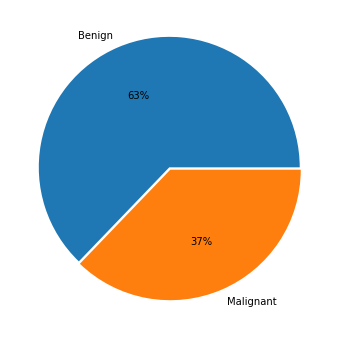

In [43]:
from matplotlib import pyplot as plt
plt.figure(figsize=(6,6))
plt.pie(x = y_train.value_counts(),labels=['Benign','Malignant'], explode=[0.02,0],autopct='%1.0f%%')
plt.show()

In [44]:
X_test.shape,y_test.shape

((171, 11), (171,))

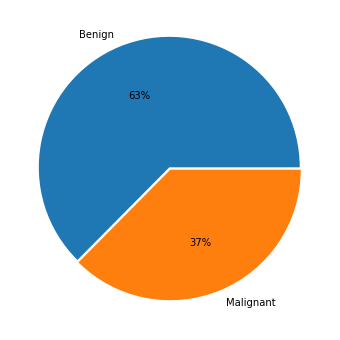

In [45]:
from matplotlib import pyplot as plt
plt.figure(figsize=(6,6))
plt.pie(x = y_test.value_counts(),labels=['Benign','Malignant'], explode=[0.02,0],autopct='%1.0f%%')
plt.show()

### Model Training

In [46]:
import warnings
warnings.filterwarnings('ignore')

In [47]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression() #Object / Instatiation
logistic_model.fit(X_train,y_train)

LogisticRegression()

In [48]:
print("Beta's of Classification Model are", logistic_model.coef_)

Beta's of Classification Model are [[ 0.98405742  0.8824566   1.8558292   1.63686158  0.86191114  1.43368835
   0.6199821  -0.9500841  -0.72809192  1.54401994  1.00356266]]


In [49]:
print("Beta'0' of Classification Model is",logistic_model.intercept_)

Beta'0' of Classification Model is [-0.40398154]


### 7. Model Testing || 8. Model Evaluation

## Train Data

In [50]:
y_pred_train = logistic_model.predict(X_train)

In [51]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [52]:
Accuracy_Score = accuracy_score(y_train,y_pred_train)

In [53]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       250
           1       0.99      0.95      0.97       148

    accuracy                           0.98       398
   macro avg       0.98      0.97      0.98       398
weighted avg       0.98      0.98      0.98       398



In [54]:
cm = confusion_matrix(y_train,y_pred_train)

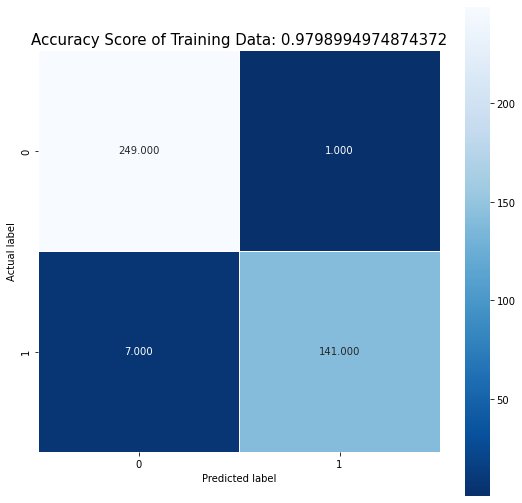

In [56]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score of Training Data: {0}'.format(Accuracy_Score)
plt.title(all_sample_title, size = 15);

Area Under the Curev (auc) of training data 0.9743513513513513


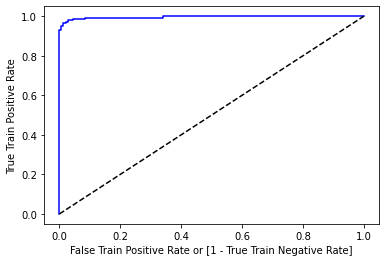

In [423]:
from sklearn.metrics import roc_curve,roc_auc_score

fpr, tpr, thresholds = roc_curve(y_train,logistic_model.predict_proba (X_train)[:,1])

auc = roc_auc_score(y_train,y_pred_train)
print("Area Under the Curev (auc) of training data",auc)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='blue', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Train Positive Rate or [1 - True Train Negative Rate]')
plt.ylabel('True Train Positive Rate')
plt.show()

## Test Data

In [424]:
y_pred_test = logistic_model.predict(X_test)

In [425]:
Accuracy_score_test = accuracy_score(y_test,y_pred_test)

In [426]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       107
           1       0.98      0.92      0.95        64

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171



In [427]:
# import statsmodels.api as sm      # Scipy or sklearn or statmodels.api
# import statsmodels.formula.api as smf # A way to do forward and backward selections
# X = breast_cancer_data[['intercept','RadiusM','TextureM','PerimeterM','AreaM','SmoothnessM','CompactnessM','ConcavityM','ConcavePointsM','SymmetryM','FdimensionM']]
# y = breast_cancer_data[['Diagnosis']]
# y =pd.get_dummies(y, columns=['Diagnosis'], drop_first=True)
# logistic_model = sm.GLM(y, X, family=sm.families.Binomial())
# logistic_model = logistic_model.fit()

# logistic_model.summary()

In [428]:
cm = confusion_matrix(y_test,y_pred_test)
cm

array([[106,   1],
       [  5,  59]], dtype=int64)

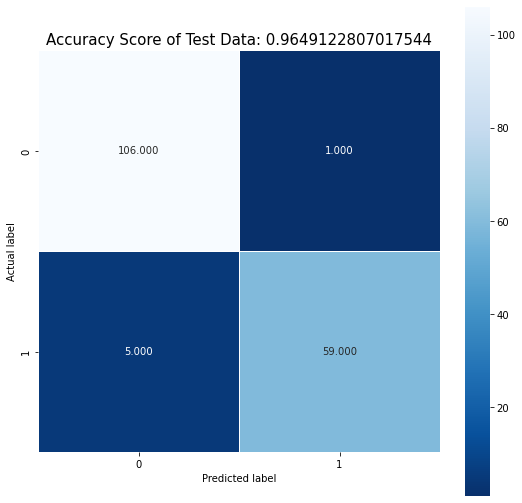

In [429]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score of Test Data: {0}'.format(Accuracy_score_test)
plt.title(all_sample_title, size = 15);

Area Under the Curev (auc) of testing data 0.9562646028037384


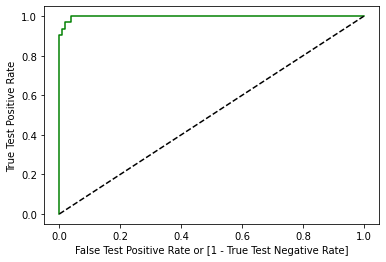

In [430]:
from sklearn.metrics import roc_curve,roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test,logistic_model.predict_proba (X_test)[:,1])

auc = roc_auc_score(y_test,y_pred_test)
print("Area Under the Curev (auc) of testing data",auc)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='green', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Test Positive Rate or [1 - True Test Negative Rate]')
plt.ylabel('True Test Positive Rate')
plt.show()

In [431]:
import statsmodels.api as sm      # Scipy or sklearn or statmodels.api
import statsmodels.formula.api as smf # A way to do forward and backward selections
logistic_model = sm.GLM(y, X, family=sm.families.Binomial())
logistic_model = logistic_model.fit()
logistic_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Diagnosis   No. Observations:                  569
Model:                            GLM   Df Residuals:                      558
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -30.670
Date:                Sat, 08 Apr 2023   Deviance:                       61.341
Time:                        04:45:08   Pearson chi2:                 1.92e+03
No. Iterations:                    11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.3700      1.196      1.981      0.048       0.026       4.714
x2            -0.7896      1.876     -0.421      0.674      -4.466       2.887
x3             2.9156      0.690      4.226      0.000       1.563       4.268
x4             6.3481      3.486      1.821      0.069      -0.484      13.181
x5            -1.3727      2.634     -0.521      0.602      -6.536       3.790
x6             1.2574      1.963      0.640      0.522      -2.591       5.106
x7             1.0362      0.591      1.754      0.079      -0.122       2.194
x8            -1.3026      0.485     -2.687      0.007      -2.253      -0.352
x9            -1.1626      0.714     -1.629      0.103      -2.561       0.236
x10            5.3376      3.251      1.642      0.101      -1.035      11.710
x11            3.4313      1.500      2.287      0.022       0.490       6.372
==============================================================================
"""

In [432]:
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM",
         "Decision Tree", "New Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes","LDA","Logistic Regression","Hybrid"]

classifiers = [
    KNeighborsClassifier(2),
    SVC(kernel="linear", C=8),
    SVC(gamma=.4, C=1),
    DecisionTreeClassifier(max_depth=5),
    DecisionTreeClassifier(min_samples_leaf=300),
    RandomForestClassifier(max_depth=3, n_estimators=15, max_features=5),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    LogisticRegression(),
    LogisticRegression()]

y=y

# preprocess dataset, split into training and test part
X = StandardScaler().fit_transform(X)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y,shuffle=True)

threshold = np.sum(1*(y_train==1))/len(y_train)                            # Recommended threshold = n_1/n

Y_pred = pd.DataFrame() # Declare a panda
Y_pred['Class_true'] = y_test

Y_pred_train = pd.DataFrame() # Declare a panda
Y_pred_train['Class_true'] = y_train

Y_results_test = pd.DataFrame(columns = ['Classifier','TP','FP','TN','FN','Precision','Recall','F1_score','Accuracy','Specificity','Sensitivity'])

Y_results_train = pd.DataFrame(columns = ['Classifier','TP','FP','TN','FN','Precision','Recall','F1_score','Accuracy','Specificity','Sensitivity'])

# iterate over classifiers
for name, clf in zip(names, classifiers):
    
    if name is "Hybrid":
        Z = np.round(np.median(Y_pred,axis=1),0).astype(int)
        Y_pred[name] = Z
    else:
    
        clf.fit(X_train, y_train)

        # Testing performance
        score = clf.score(X_test, y_test)

        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(X_test)
            #Y_pred[prob_name] = Z
            Z = clf.predict(X_test)
            Y_pred[name] = Z
        else:
            Z = clf.predict_proba(X_test)
            Z = Z[:,1]                                                # Label for class 1
            #Y_pred[prob_name] = Z
            Y_pred[name] = 1*(Z>threshold)
        
    TP_output = 1*((Y_pred['Class_true']==1) & (Y_pred[name] == 1))
    FP_output = 1*((Y_pred['Class_true']==0) & (Y_pred[name] == 1))
    TN_output = 1*((Y_pred['Class_true']==0) & (Y_pred[name] == 0))
    FN_output = 1*((Y_pred['Class_true']==1) & (Y_pred[name] == 0))

    TP = np.sum(TP_output)+1 # True positives
    FP = np.sum(FP_output)+1 # False positives
    TN = np.sum(TN_output)+1 # True negatives
    FN = np.sum(FN_output)+1 # False negatives
    TPR = TP/(TP+FN)          # True positive rate
    TNR = TN/(TN+FP)          # True negative rate
    Pr = TP/(TP+FP)
    Re = TP/(TP+FN)
    acc = (TP+TN)/(TP+FP+FN+TN)
    bal_acc = (TPR+TNR)/2
    F1 = 2*(Pr*Re)/(Pr+Re)
        
    Y_results_test = Y_results_test.append({'Classifier': name, 'TP': TP-1,'FP': FP-1,'TN': TN-1,'FN': FN-1,'Precision': Pr,'Recall': Re,'F1_score': F1,'Accuracy': acc,'Specificity': TNR,'Sensitivity': TPR},ignore_index=True)
    
    
    # Training performance
    if name is 'Hybrid':
        Z = np.round(np.median(Y_pred_train,axis=1),0).astype(int)
        Y_pred_train[name] = Z
    else:
        score = clf.score(X_train, y_train)

        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(X_train)
            #Y_pred_train[prob_name] = Z
            Z = clf.predict(X_train)
            Y_pred_train[name] = Z
        else:
            Z = clf.predict_proba(X_train)
            Z = Z[:,1]                                                # Label for class 1
            #Y_pred_train[prob_name] = Z
            Y_pred_train[name] = 1*(Z>threshold)
        
    TP_output = 1*((Y_pred_train['Class_true']==1) & (Y_pred_train[name] == 1))
    FP_output = 1*((Y_pred_train['Class_true']==0) & (Y_pred_train[name] == 1))
    TN_output = 1*((Y_pred_train['Class_true']==0) & (Y_pred_train[name] == 0))
    FN_output = 1*((Y_pred_train['Class_true']==1) & (Y_pred_train[name] == 0))

    TP = np.sum(TP_output)+1 # True positives
    FP = np.sum(FP_output)+1 # False positives
    TN = np.sum(TN_output)+1 # True negatives
    FN = np.sum(FN_output)+1 # False negatives
    TPR = TP/(TP+FN)          # True positive rate
    TNR = TN/(TN+FP)          # True negative rate
    Pr = TP/(TP+FP)
    Re = TP/(TP+FN)
    acc = (TP+TN)/(TP+FP+FN+TN)
    bal_acc = (TPR+TNR)/2
    F1 = 2*(Pr*Re)/(Pr+Re)
        
    Y_results_train = Y_results_train.append({'Classifier': name, 'TP': TP,'FP': FP,'TN': TN,'FN': FN,'Precision': Pr,'Recall': Re,'F1_score': F1,'Accuracy': acc,'Specificity': TNR,'Sensitivity': TPR},ignore_index=True)
    
    print('Finished running analysis for', name)

Y_results_test

Finished running analysis for Nearest Neighbors
Finished running analysis for Linear SVM
Finished running analysis for RBF SVM
Finished running analysis for Decision Tree
Finished running analysis for New Decision Tree
Finished running analysis for Random Forest
Finished running analysis for Neural Net
Finished running analysis for AdaBoost
Finished running analysis for Naive Bayes
Finished running analysis for LDA
Finished running analysis for Logistic Regression
Finished running analysis for Hybrid


,Classifier,TP,FP,TN,FN,Precision,Recall,F1_score,Accuracy,Specificity,Sensitivity
0,Nearest Neighbors,61,4,103,3,0.925373,0.939394,0.932331,0.948571,0.954128,0.939394
1,Linear SVM,58,1,106,6,0.967213,0.893939,0.929134,0.948571,0.981651,0.893939
2,RBF SVM,60,2,105,4,0.953125,0.924242,0.938462,0.954286,0.972477,0.924242
3,Decision Tree,58,1,106,6,0.967213,0.893939,0.929134,0.948571,0.981651,0.893939
4,New Decision Tree,0,0,107,64,0.500000,0.015152,0.029412,0.622857,0.990826,0.015152
5,Random Forest,60,5,102,4,0.910448,0.924242,0.917293,0.937143,0.944954,0.924242
6,Neural Net,61,1,106,3,0.968750,0.939394,0.953846,0.965714,0.981651,0.939394
7,AdaBoost,59,1,106,5,0.967742,0.909091,0.937500,0.954286,0.981651,0.909091
8,Naive Bayes,56,1,106,8,0.966102,0.863636,0.912000,0.937143,0.981651,0.863636
9,LDA,56,0,107,8,0.982759,0.863636,0.919355,0.942857,0.990826,0.863636
